['S010-epo.fif', 'S014-epo.fif', 'S008-epo.fif', 'S009-epo.fif', 'S015-epo.fif', 'S018-epo.fif', 'S023-epo.fif']
Reading /Users/jakubblaha/Documents/thesis/thesis-python/notebooks/../data/segmented/15s/clean/S115-epo.fif ...
    Found the data of interest:
        t =       0.00 ...   14992.19 ms
        0 CTF compensation matrices available
Adding metadata with 3 columns
8 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/jakubblaha/Documents/thesis/thesis-python/notebooks/../data/segmented/15s/clean/S105-epo.fif ...
    Found the data of interest:
        t =       0.00 ...   14992.19 ms
        0 CTF compensation matrices available
Adding metadata with 3 columns
8 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/jakubblaha/Documents/thesis/thesis-python/notebooks/../data/segmented/15s/clean/S104-epo.fif ...
    Found the data of interest:
        t =       0.00 ...   14992.19 ms
        0 

Text(0.5, 1.0, 'GAD dataset low anxiety')

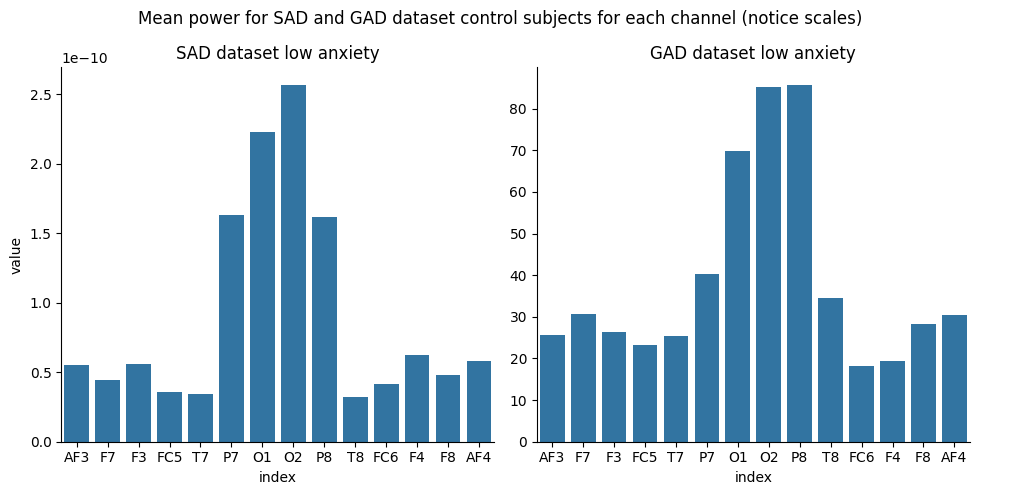

In [90]:
import glob, os, mne, mne_features
import numpy as np
import seaborn as sns
import pandas as pd

DASPS_HAM_CONTROL_SUBJS = [10, 14, 8, 9, 15, 18, 23]
CHANNEL_NAMES = ['AF3', 'F7', 'F3', 'FC5', 'T7',
                 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
dasps_ham_control_basenames = [f'S{subj:03d}-epo.fif' for subj in DASPS_HAM_CONTROL_SUBJS]

print(dasps_ham_control_basenames)

all_files = glob.glob('../data/segmented/15s/clean/*')
sad_files = [i for i in all_files if os.path.basename(i).startswith('S1')]
gad_files = [i for i in all_files if os.path.basename(i) in dasps_ham_control_basenames]

def mean_from_epochs(data):
    powers_of_epochs = []

    for epoch in data:
        powers = mne_features.univariate.compute_pow_freq_bands(128, epoch, freq_bands=[4, 30], normalize=False)
        powers_of_epochs.append(powers)

    powers_of_epochs = np.array(powers_of_epochs)
    mean_powers = np.mean(powers_of_epochs, axis=0)

    return mean_powers


sad_epochs = []

for file in sad_files:
    epochs = mne.read_epochs(file)
    data = epochs.get_data()

    sad_epochs += list(data)

sad_mean = mean_from_epochs(sad_epochs)

gad_epochs = []

for file in gad_files:
    epochs = mne.read_epochs(file)
    data = epochs.get_data()

    gad_epochs += list(data)

gad_mean = mean_from_epochs(gad_epochs)

df = pd.DataFrame({
    'sad': sad_mean,
    'gad': gad_mean
}).reset_index().melt(id_vars='index')

g = sns.catplot(df, kind='bar', col='variable', x='index', y='value', sharey=False)
g.set_xticklabels(CHANNEL_NAMES)
g.figure.suptitle('Mean power for SAD and GAD dataset control subjects for each channel (notice scales)')
g.tight_layout()

g.axes[0, 0].set_title('SAD dataset low anxiety')
g.axes[0, 1].set_title('GAD dataset low anxiety')

Mean ratio:  526877814259.087


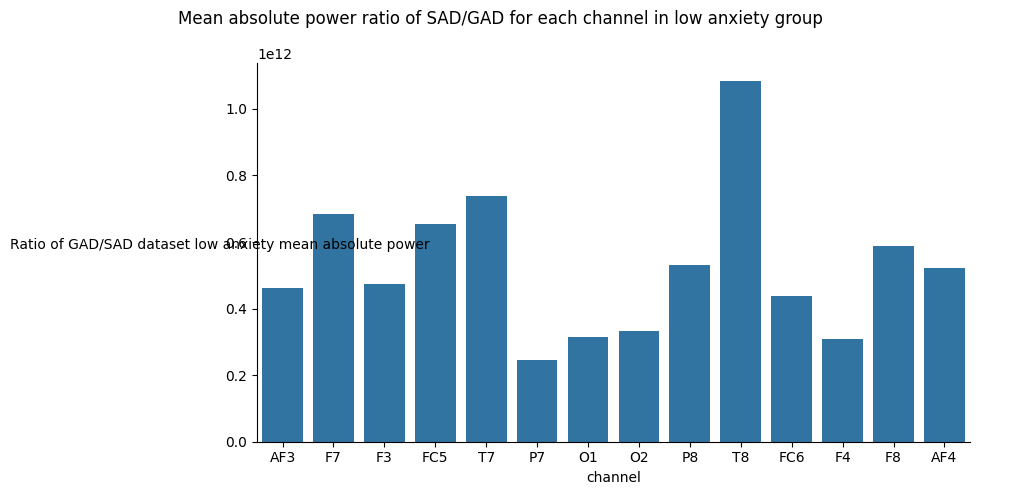

In [93]:
ratios = gad_mean / sad_mean

df = pd.DataFrame({
    'channel': CHANNEL_NAMES,
    'ratio': ratios
})

g = sns.catplot(df, kind='bar', x='channel', y='ratio', aspect=2)
g.set_ylabels('Ratio of GAD/SAD dataset low anxiety mean absolute power', rotation=0)
g.figure.suptitle('Mean absolute power ratio of SAD/GAD for each channel in low anxiety group')
g.tight_layout()

print("Mean ratio: ", np.mean(ratios))
